# Week 1-2 Charts - Python

author: Rodrigo Rodriguez

date: 2024-03-15

## 1.2 Exercises: Charts in Python

**Instructions)**

Generate the following from the practice datasets.

1 bar chart, 1 stacked bar chart, 1 pie chart, and 1 donut with Python

**Answer)**

### *Plots*

*Reading and opening the data*

In [1]:
import pandas as pd

# reading the data
hotdog_hs = pd.read_excel('C:/Users/ivan2/OneDrive/Documents/School/BU/DSC 640 Data Presentation - Visualization/Sample Datasets/ex1-2/ex1-2/hotdog-contest-winners.xlsm')
hotdog_hs.head(5)

,Year,Winner,Dogs eaten,Country,New record,Win Count
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0,1
1,1981,Thomas DeBerry,11.0,United States,0,1
2,1982,Steven Abrams,11.0,United States,0,1
3,1983,Luis Llamas,19.5,Mexico,0,1
4,1984,Birgit Felden,9.5,Germany,0,1


In [2]:
import matplotlib.pyplot as plt

Creating the bar graph for Sum of Dogs Eaten by Year

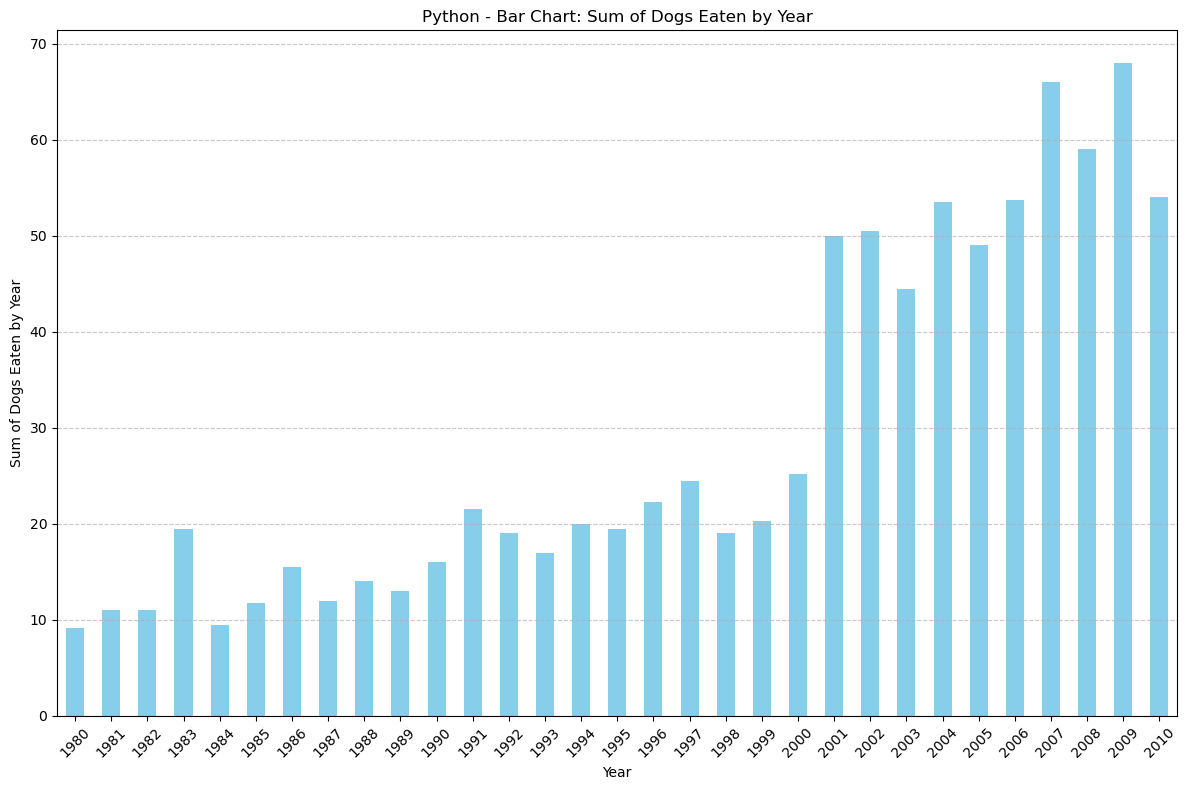

In [3]:
# Group the data by Year and sum the 'Dogs eaten'
dogs_eaten_per_year = hotdog_hs.groupby('Year')['Dogs eaten'].sum()

# Create a bar graph
plt.figure(figsize=(12, 8))
dogs_eaten_per_year.plot(kind='bar', color='skyblue')
plt.title('Python - Bar Chart: Sum of Dogs Eaten by Year')
plt.xlabel('Year')
plt.ylabel('Sum of Dogs Eaten by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Changing the data type of Win Count to object

In [4]:
hotdog_hs['Win Count'] = hotdog_hs['Win Count'].astype(object)

In [5]:
hotdog_hs.dtypes

Year            int64
Winner         object
Dogs eaten    float64
Country        object
New record      int64
Win Count      object
dtype: object

Now Creating the Stacked Bar Graph by Win Count

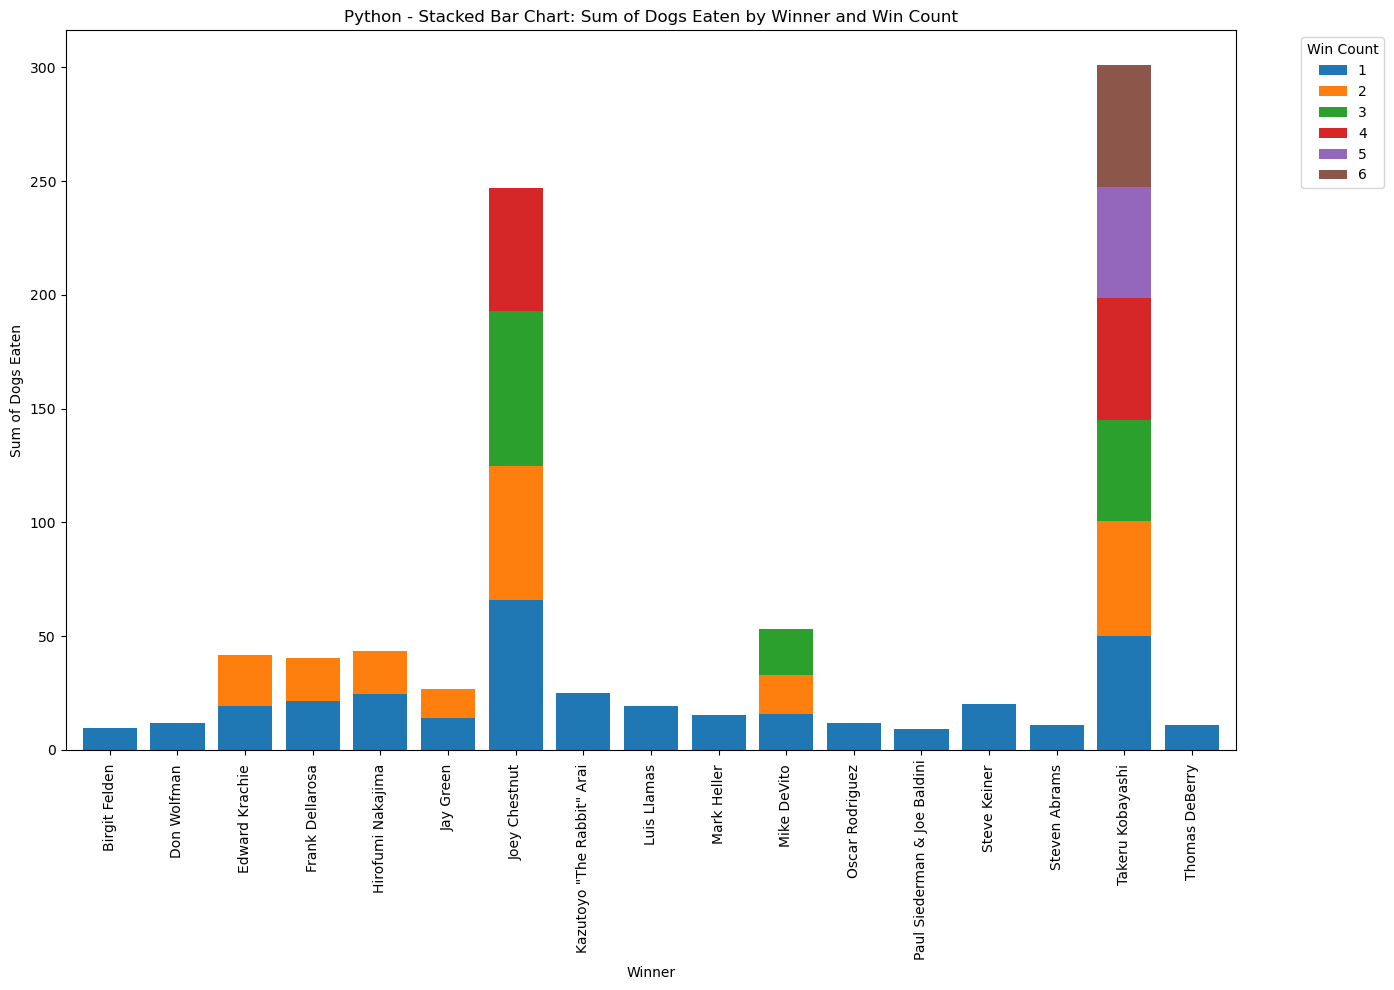

In [6]:
# Group the data by Winner and Win Count, then sum the 'Dogs eaten'
dogs_eaten_by_winner_by_wincount = hotdog_hs.groupby(['Winner', 'Win Count'])['Dogs eaten'].sum().unstack().fillna(0)

# Now plot the stacked bar chart
dogs_eaten_by_winner_by_wincount.plot(kind='bar', stacked=True, figsize=(14, 10), width=0.8)

plt.title('Python - Stacked Bar Chart: Sum of Dogs Eaten by Winner and Win Count')
plt.xlabel('Winner')
plt.ylabel('Sum of Dogs Eaten')
plt.xticks(rotation=90)
plt.legend(title='Win Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Next is the pie chart for winner by country

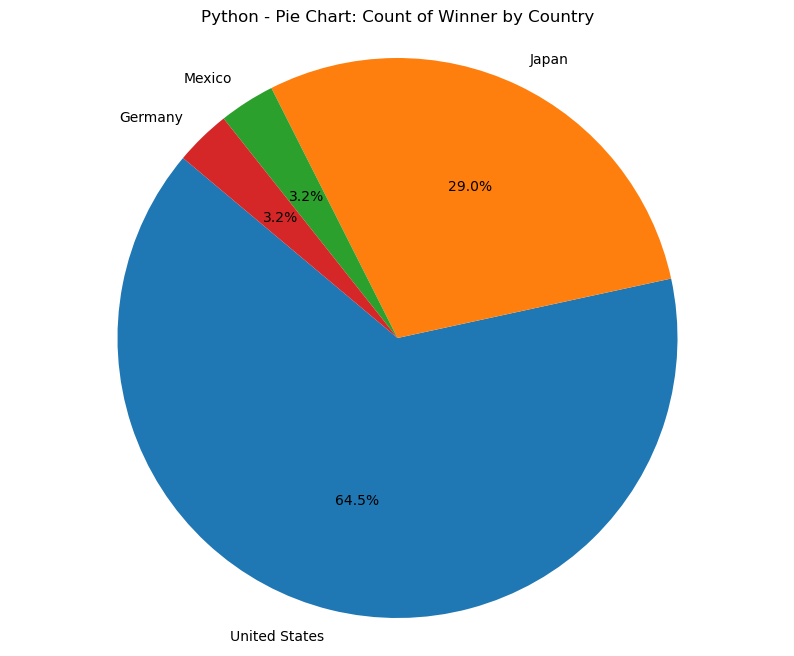

In [7]:
# Aggregate the data by country and count the number of wins for each
winner_counts_by_country = hotdog_hs['Country'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(winner_counts_by_country, labels=winner_counts_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Python - Pie Chart: Count of Winner by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

Lastly is the donut chart for Dogs Eaten by Win Count for Joey

In [10]:
# Filter the data for records where the winner is 'Joey Chestnut '
joey_chestnut_data_corrected = hotdog_hs[hotdog_hs['Winner'] == 'Joey Chestnut ']

# Aggregate the data by win count, summing up the number of hot dogs eaten for each win count
sum_dogs_by_win_count_corrected = joey_chestnut_data_corrected.groupby('Win Count')['Dogs eaten'].sum()

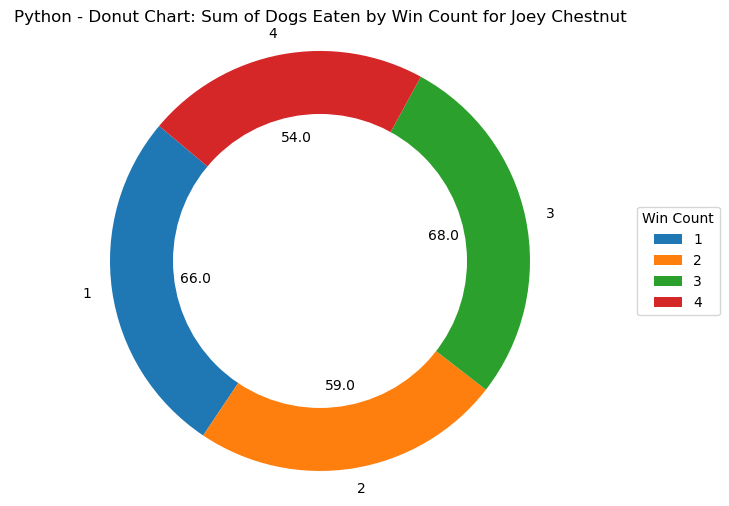

In [11]:
# donut chart with legend and actual values
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(sum_dogs_by_win_count_corrected, labels=sum_dogs_by_win_count_corrected.index,
                                   autopct=lambda pct: "{:.1f}".format(pct * sum_dogs_by_win_count_corrected.sum() / 100),
                                   startangle=140)

plt.title('Python - Donut Chart: Sum of Dogs Eaten by Win Count for Joey Chestnut')

# circle at the center of pie to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# adding legend
plt.legend(wedges, sum_dogs_by_win_count_corrected.index,
           title="Win Count",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Show the updated donut chart
plt.show()